<a href="https://colab.research.google.com/github/santhosh47/Deep_Learning_-_Artificial_Intelligence_Tutorial/blob/main/DL_04_RNN_and_Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sequential Modelling**

We have this picture of a ball and our task is to predict where this ball is going to travel to next now if i don't give you any prior information on the ball's history any guess on its next position is just going to be that a random guess

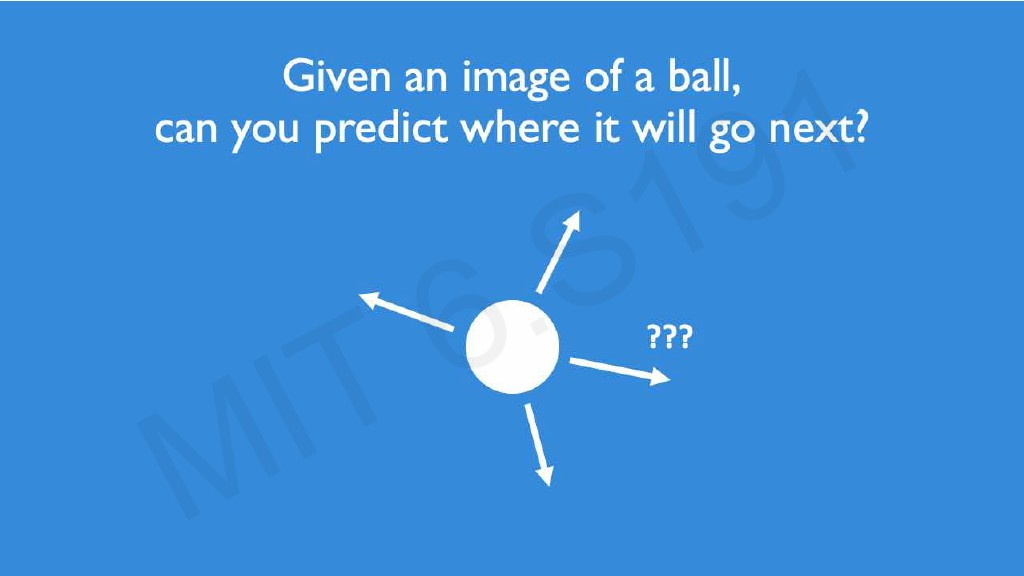

Instead if in addition to the current location of the ball i also gave you some information about its previous locations now our problem becomes much easier and i think we can all agree that we have a sense of where this ball is going to next.

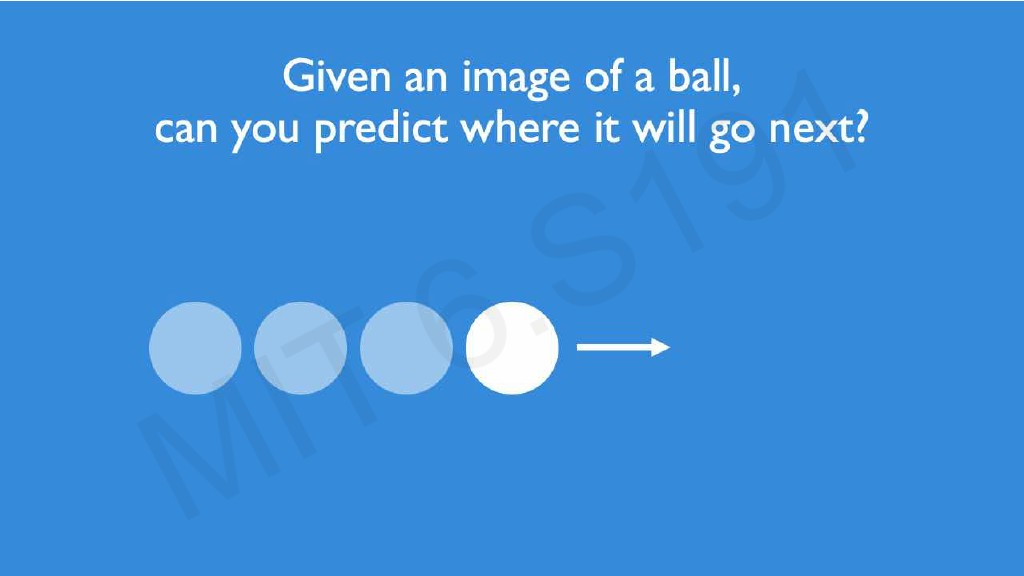

Beyond this simple example the fact of the matter is that sequential data is all around us. 

For example **audio like the waveform** of my voice speaking to you can be split up into a sequence of sound waves, while text can be split up into a sequence of characters or a sequence of words.

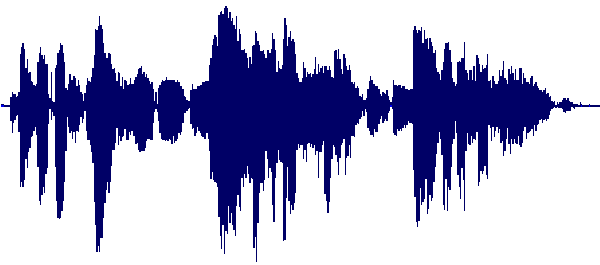

Beyond these two examples there are many many more cases in which sequential processing may be useful from **medical signals like ekgs to stock prices to dna sequences and beyond**.

Now that we've gotten a sense of what sequential data looks like let's consider applications of sequential modeling in the real world.

We learned about this notion of feed-forward models that operate sort of on this one-to-one fixed setting, a single input to a single output. We saw the very simple example of a binary classification task predicting whether a student will pass or fail this class of course. **But in this example there's no real component of time or sequence** 

In contrast with sequence modeling we can now handle a vast variety of different types of problems, where for example we have a sequence of temporal inputs and potentially a sequential output.

**Example:**

1. Let's consider one example right where we have a natural language processing task where we have a tweet and we want to classify the emotion or the sentiment associated with that tweet mapping a sequence of words to a positive or negative label

2. We can also have a case where our input initially may not have a time dimension so for example we have this image of a baseball player throwing a ball but instead the output that we want to generate has a temporal or sequential component where we now want to caption that image with some associated text

3. finally we can have a final case where we have a sequential input and we want to map it to a sequential output for example in the case of translating text from one language to another

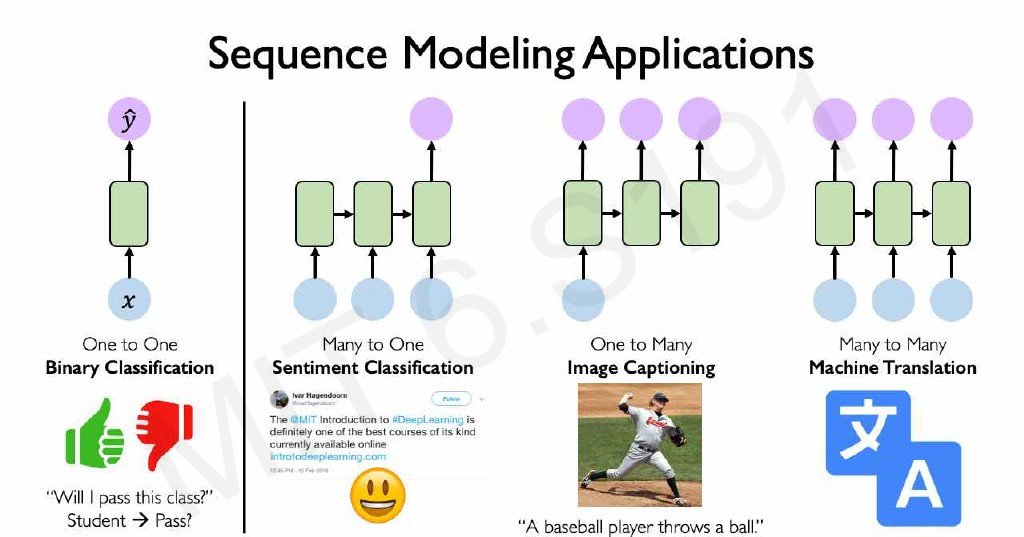

# **How we can add a new temporal dimension to our models and so to achieve this understanding?**

Let us start from the fundamentals and revisit the concept of the perceptron. Let's recall the architecture and the the diagram of the perceptron which we studied. 

1. We defined a set of inputs and 
2. We have these weights that are associated with connecting those inputs to an internal node and 
3. We can apply those weights apply a non-linearity and get this output.

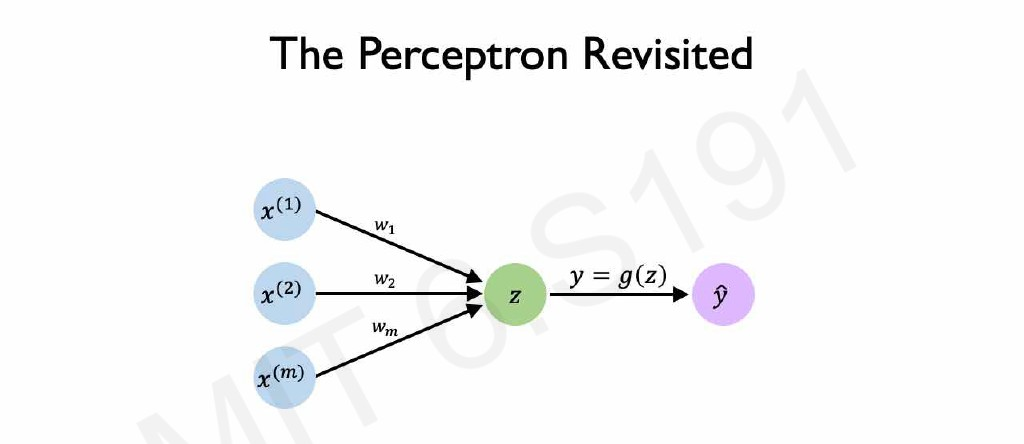

 4. We can extend this now to a layer of individual neurons a layer of perceptrons to yield a multi-dimensional output



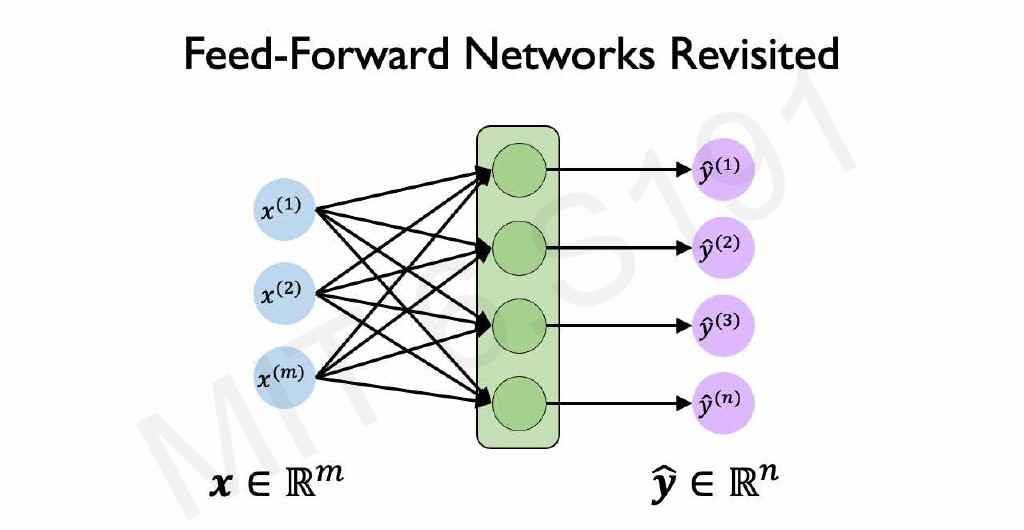

In this example we have a single layer of perceptrons shown in green taking three inputs shown in blue predicting four outputs in purple. 

**Does this have a notion of time or of sequence? Not yet!**

Let's simplify that diagram right what i've done here is just i've collapsed that layer of those four perceptrons into the single green box and i've collapsed those nodes of the input and the output into these single circles that are represented as vectors.

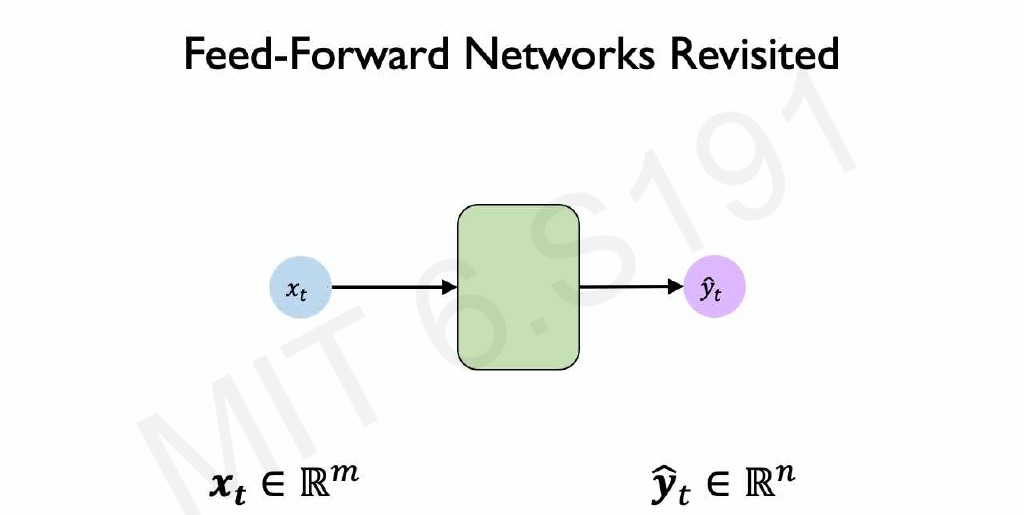

so our inputs x are some vectors of a length m and our outputs are vectors of another length n

**Still** here what we're considering is an input at a specific time denoted by t nothing different from what we saw in the previous sections and we're passing it through a **feed-forward model to get some output**.


What we could do is we could have **fed in a sequence to this model by simply applying the same model that same series of operations over and over again once for each time step in our sequence** and this is how we can handle these individual inputs which occur at individual time steps.

So first let's just rotate the same diagram i've taken it from a horizontal view to a vertical view we have this input vector at some time sub t we feed it into our network get our output and since we're interested in sequential data

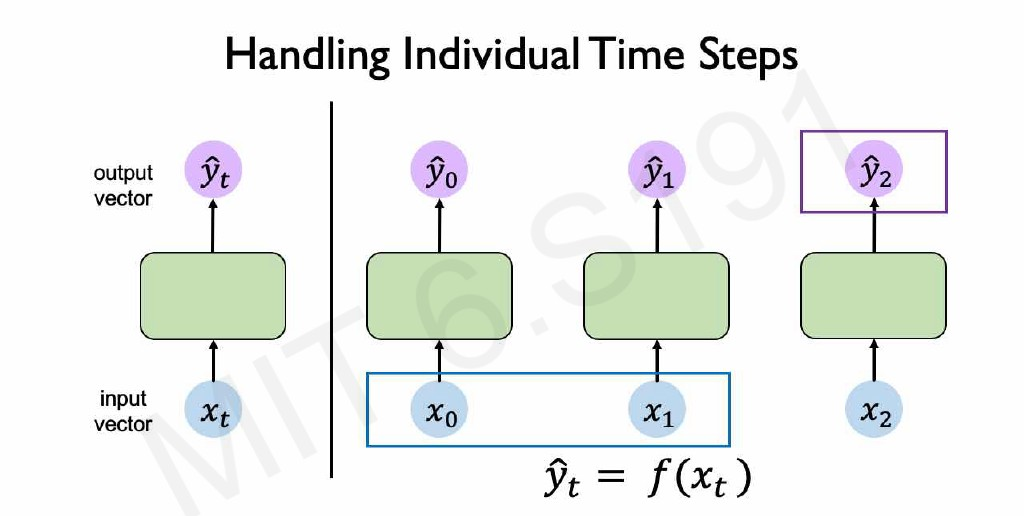

Let's assume **we don't just have a single time step** we now have multiple individual time steps starting from **t equals zero our first time step in our sequence and extending forward right** again now we're treating the individual time steps as isolated time steps.

**We don't yet have a notion of the relationship between time step zero and time step one time step two and so on and so forth**

What we know from the previous sections is that our **output vector** at a particular time step is just going to be a **function of the input at that time step**. The issue here is we have this transformation, but this is inherently sequential data and it's probably in a sequence for some important reason and **we don't yet have any sort of interdependence or notion of interconnectedness across time steps here**


So if we consider the **output at our last time step** the fundamental point is that that **output is related to the inputs at the previous time steps** 

# **How can we capture this interdependence?**

What we need is a **way to relate the network's computations at a particular time step to its prior history and its memory of the computations from those prior time steps passing information forward propagating it through time**

###**Recurrence Relation / Recurrent Neural models**

What we consider doing is actually linking the information and the computation of the network at different time steps to each other via what we call a recurrence relation.

The way we do this in neural recurrent models is by having what we call an **internal memory or a state** which we're going to denote as h(t)

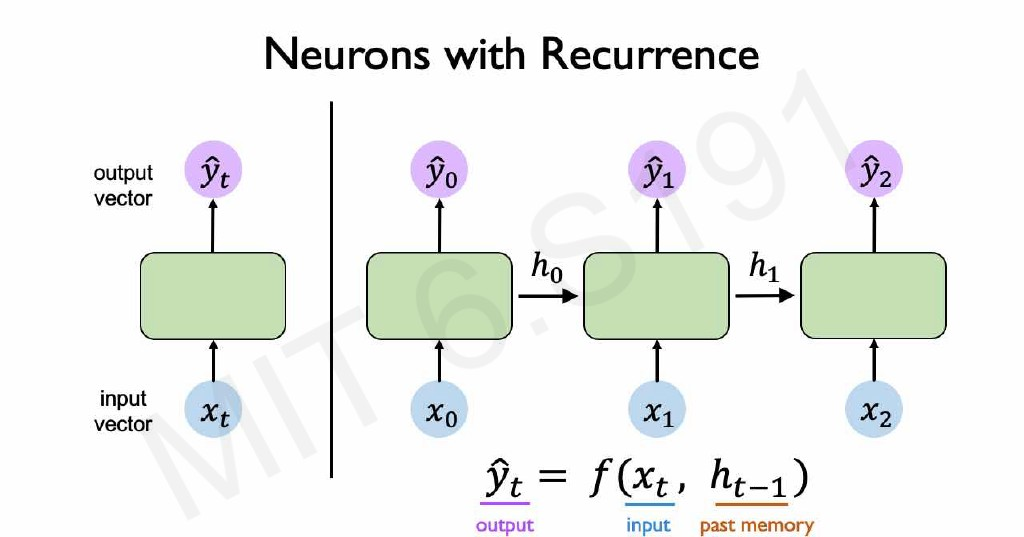


This value h(t) is maintained time, set to time step and it can be passed forward across time.

The idea and the intuition here is, we want the state to try to **capture some notion of memory** and what this means for the network's computation its output is that, now our output is **dependent** not only on the input at a particular time step but also this notion of the state of the memory that's going to be passed forward from the prior time step.

This **output** just to make this very explicit this output at a particular time step t **depends both on the input as well as the past memory** and that past memory is going to capture the prior history of what has occurred previously in the sequence and because this output y of t is a function of both current input past memory what this means is we can define and describe these types of neurons in terms of a recurrence relation

So on the right you can see how we visualize these individual time steps as sort of being unrolled extended across time.

But we could also depict this same relationship via a cycle which we've seen on the left which shows and highlights this concept of a recurrence relation. Hopefully this builds up some intuition about this notion of recurrence and why it can help us in sequential modeling tasks

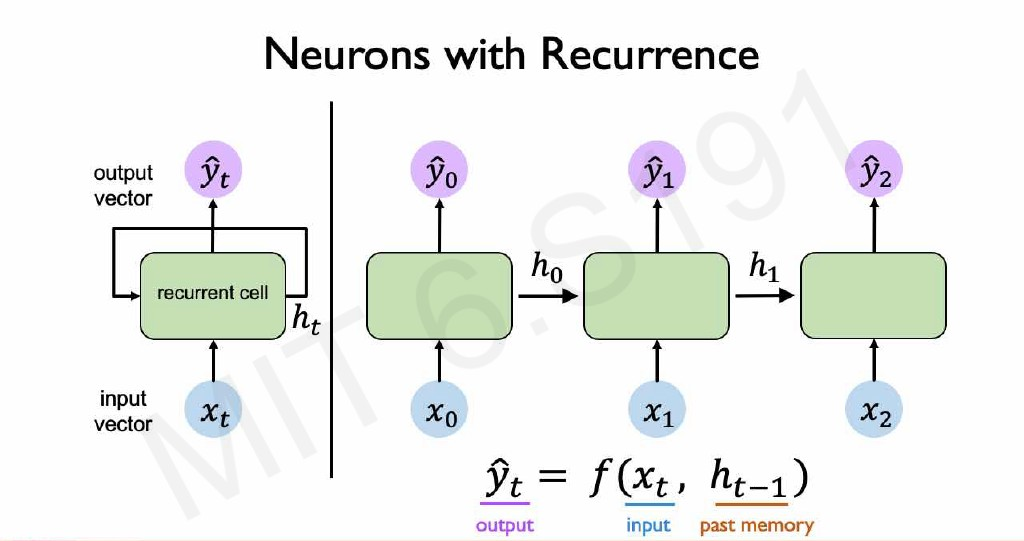

## **Recurrent Neural Network**

The key idea that I mentioned and I'm going to keep driving home is that the rnn maintains this internal state h(t) which is going to be updated at each time step as the sequence is processed.

We do this by applying this recurrence relation at every time step where our cell state is now a function.

Our cells themselves say **h(t)** is now a function of the current input **x(t)** as well as the prior state **h(t)-1**

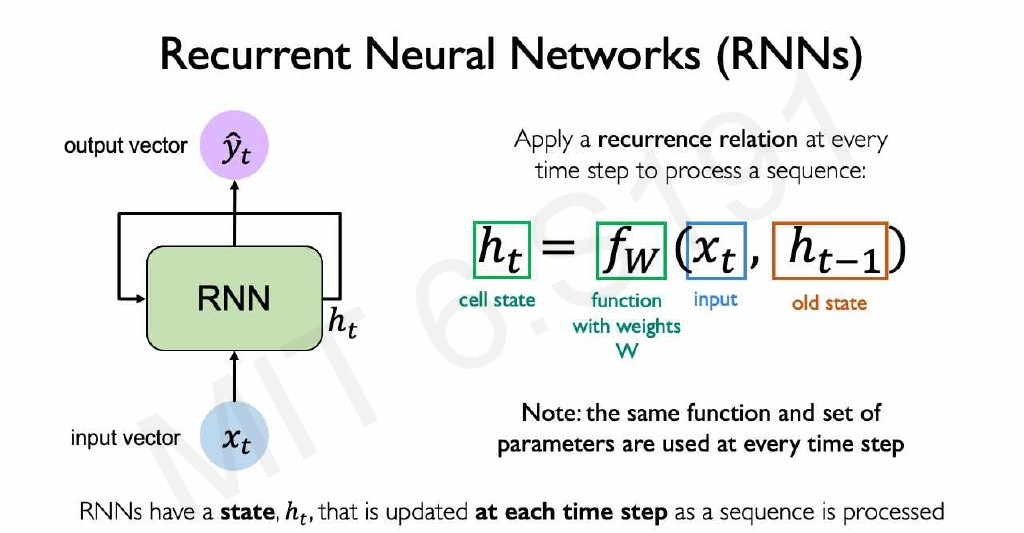

Importantly this function is parametrized by a set of weights w and this set of weights is what we're actually going to be learning through our network as the model is being learned and as these weights are being updated.

This set of weights w is the same across all time steps that are being considered in the sequence and this function that computes this hidden state is also the same.

We can also step through this intuition behind the rnn algorithm in sort of pseudo code to get a better sense of how these networks work so we can begin by initializing our rnn.


Eell first we have to initialize some first hidden state which we're going to do with a vector of zeros and we're going to consider a sentence that's going to serve as our input sequence to the model.

our task here is to try to predict the next word that's going to come at the end of the sentence and our recurrence relation is captured by this loop where we're going to iterate through the words in the sentence and at each step we're going to feed both the current word being considered as well as the previous hidden state into our rnn model and that's going to output a prediction for what the likely next word is and also update its internal computation of the hidden state and finally our last our token prediction that we're interested in at the end is the rnn's output after all the words




